In [1]:
%matplotlib inline

import pandas as pd

In [2]:
df=pd.read_csv('winequality-white.csv',sep=';')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() 

# heatmap

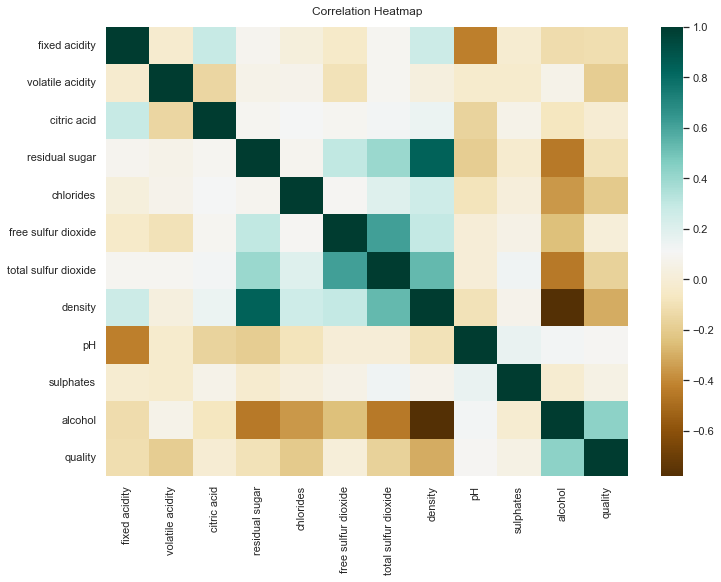

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
heatmap=sns.heatmap(df.corr(), cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_3904/1987251963.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


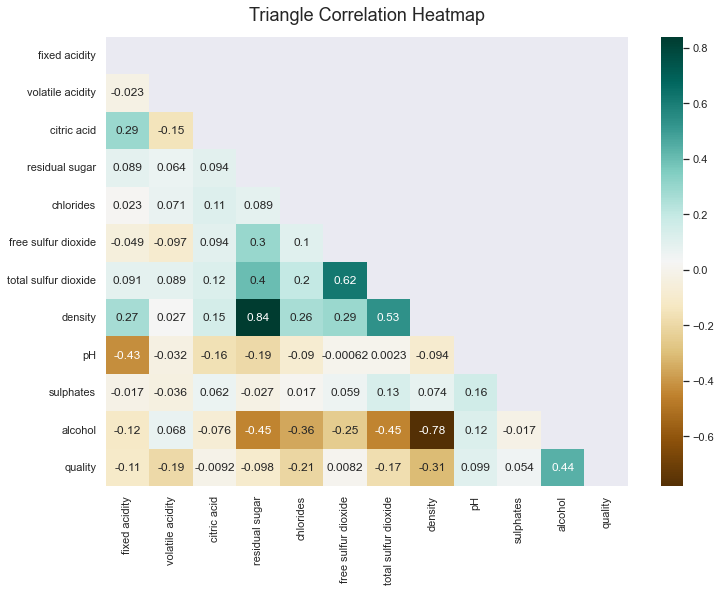

In [5]:
import numpy as np
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

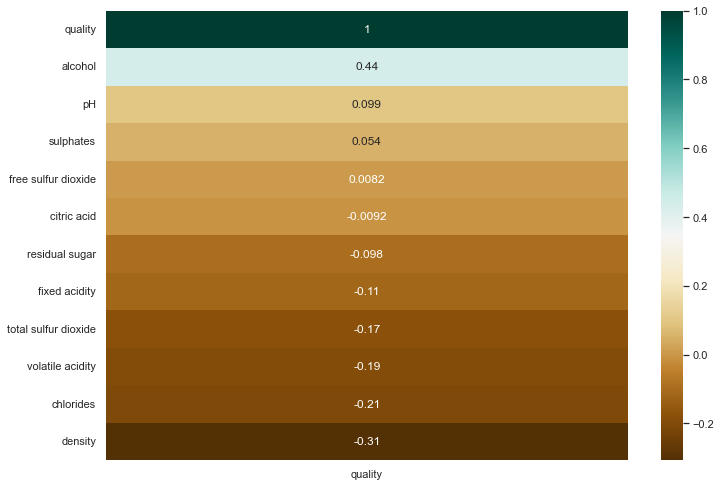

In [6]:
heatmap = sns.heatmap(df.corr()[['quality']].sort_values(by='quality', ascending=False), annot=True, cmap='BrBG')

# kdeplot/ displot

<AxesSubplot:xlabel='quality', ylabel='Density'>

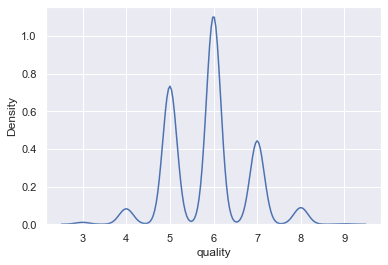

In [17]:
sns.kdeplot(df.quality)

<AxesSubplot:xlabel='quality', ylabel='Density'>

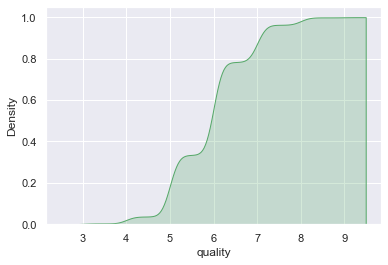

In [20]:
sns.kdeplot(df.quality, cumulative=True, shade=True, color='g')

C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='quality'>

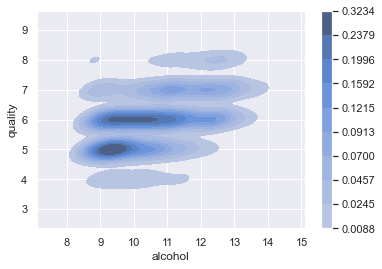

In [23]:
sns.kdeplot(df.alcohol, df.quality, shade=True, cbar=True)

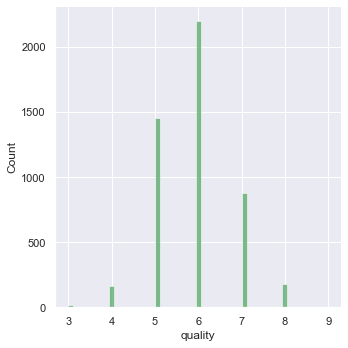

In [24]:
sns.displot(df.quality, color='g')

C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='quality'>

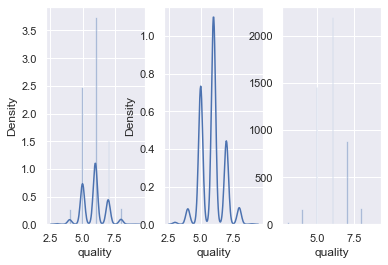

In [27]:
fig,axes=plt.subplots(1,3)
sns.distplot(df.quality,ax=axes[0]) 
sns.distplot(df.quality,hist=False,ax=axes[1])
sns.distplot(df.quality,kde=False,ax=axes[2]) 

C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality'>

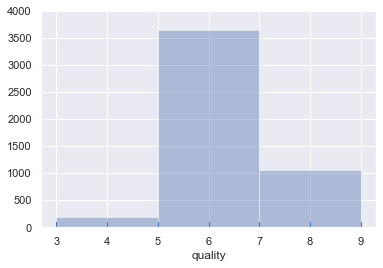

In [36]:
sns.distplot(df.quality,rug=True, kde=False,bins=3) 

C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

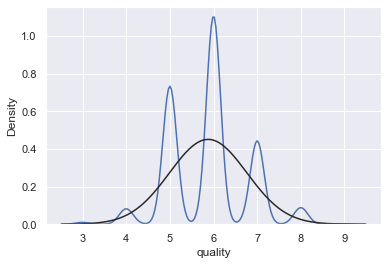

In [37]:
from scipy.stats import *
sns.distplot(df.quality,hist=False,fit=norm) #fit normal curve

C:\ProgramData\Anaconda3\envs\fet\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality'>

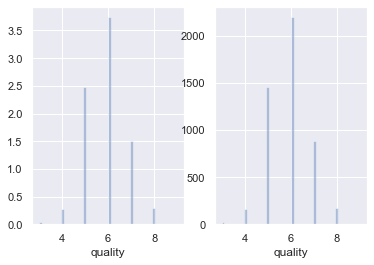

In [38]:
fig,axes=plt.subplots(1,2)
sns.distplot(df.quality,norm_hist=True,kde=False,ax=axes[0]) 
sns.distplot(df.quality,kde=False,ax=axes[1]) 

# jointplot

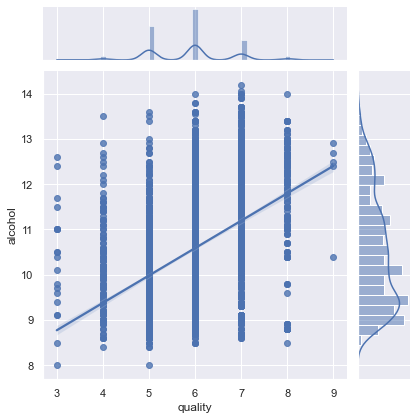

In [44]:
sns.jointplot(x='quality',y='alcohol',data=df, kind='reg')

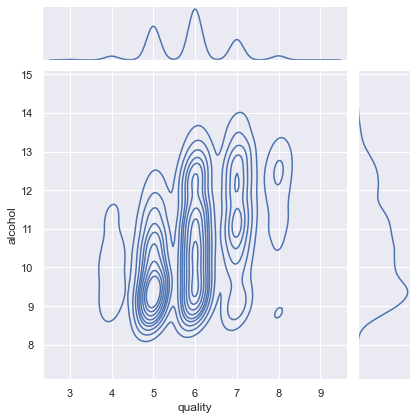

In [45]:
sns.jointplot(x='quality',y='alcohol',data=df, kind='kde')

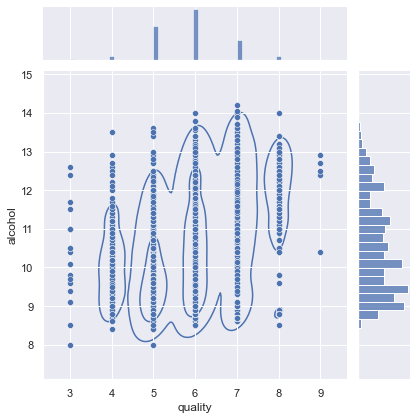

In [46]:
sns.jointplot(x='quality',y='alcohol',data=df).plot_joint(sns.kdeplot,zorder=0,n_levels=3)

# pairplot

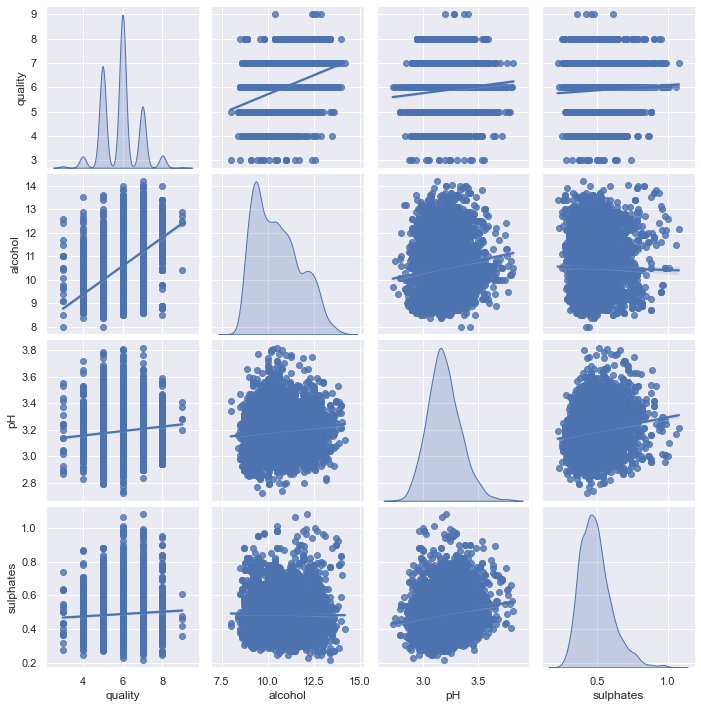

In [50]:
df1=df[['quality','alcohol','pH','sulphates']]
sns.pairplot(df1,kind='reg',diag_kind='kde')

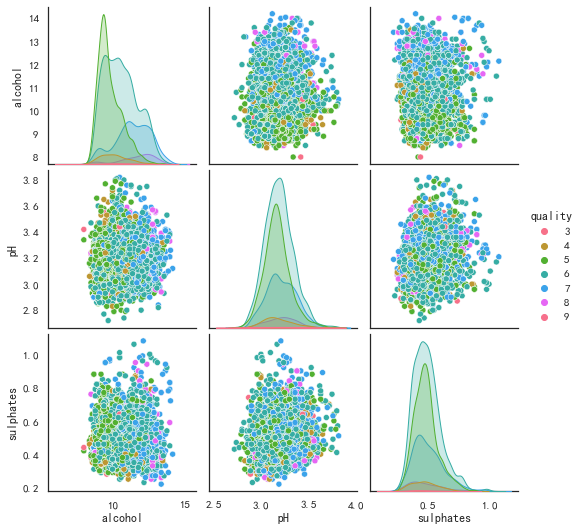

In [56]:
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})
sns.pairplot(df1,hue='quality',palette="husl")

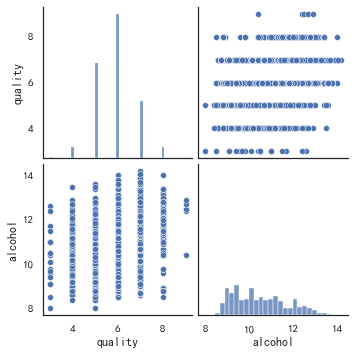

In [57]:
sns.pairplot(df1,vars=['quality','alcohol'])

# lmplot

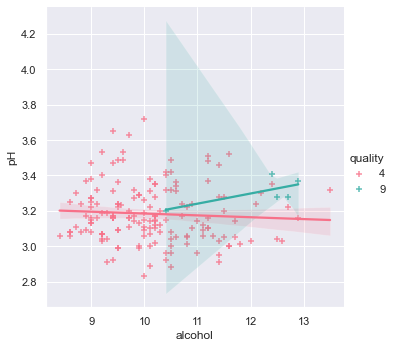

In [5]:
df2=df[df.quality.isin([4,9])]
sns.lmplot(y='pH',x='alcohol',markers='+',hue='quality',data=df2,palette='husl')

# barplot

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11744/126534860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['alcohol_level']=pd.qcut(df2.alcohol,4, labels=['low','mid','normal','high'])


<AxesSubplot:xlabel='alcohol_level', ylabel='pH'>

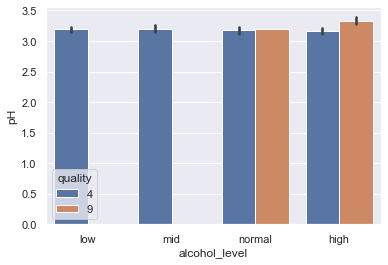

In [24]:
df2['alcohol_level']=pd.qcut(df2.alcohol,4, labels=['low','mid','normal','high'])
sns.barplot(x='alcohol_level',y='pH',hue='quality',data=df2)

# countplot

<AxesSubplot:xlabel='alcohol_level', ylabel='count'>

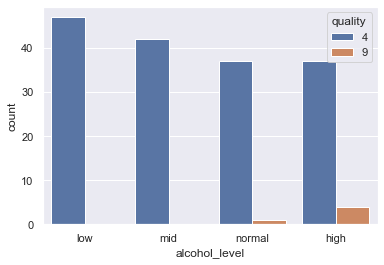

In [27]:
sns.countplot(x='alcohol_level',hue='quality',data=df2)

# catplot

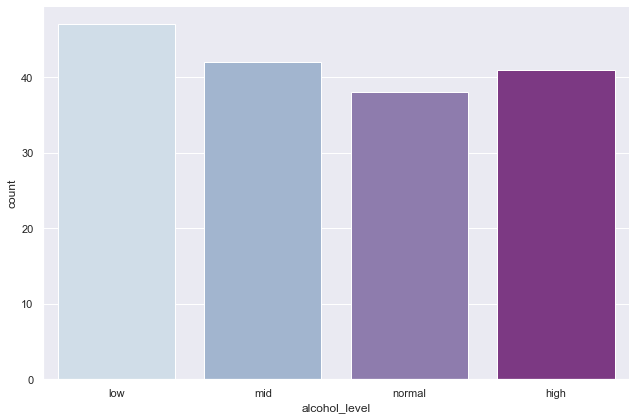

In [43]:
sns.catplot(x='alcohol_level',data=df2,kind='count',palette='BuPu', height=6, aspect=1.5)

# boxplot

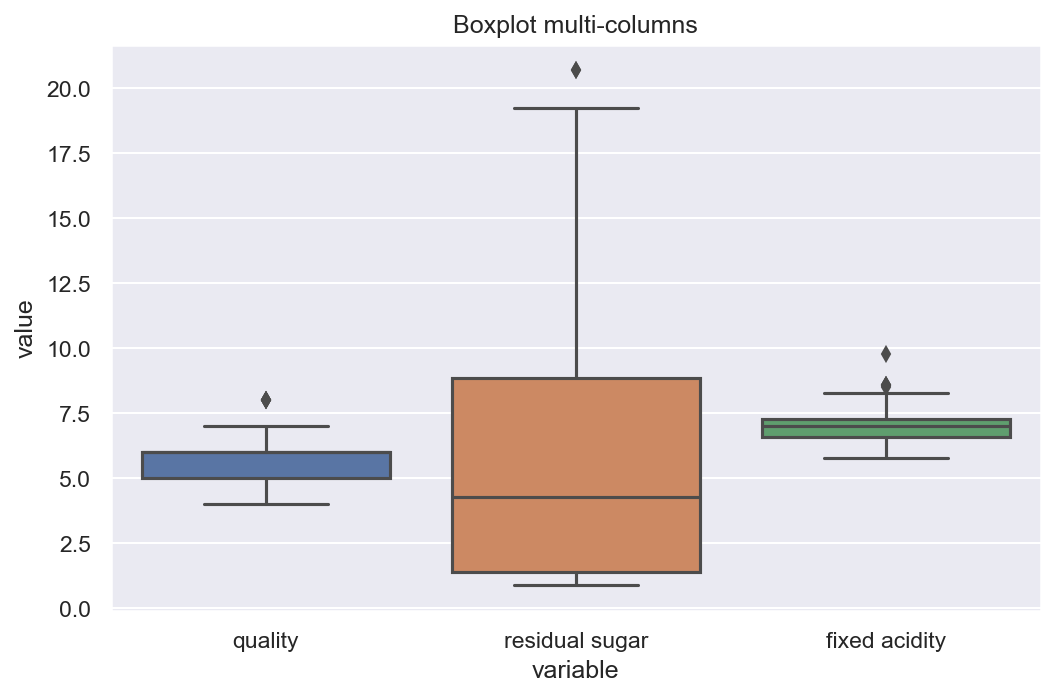

In [42]:
fig = plt.figure(figsize=(8, 5), dpi=150)

df1=df[['quality','residual sugar','fixed acidity']]
df1=df1.iloc[0:100]
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.title('Boxplot multi-columns')
plt.show()

from matplotlib.pyplot import savefig
fig.savefig('seaborn_boxplot.png', dpi=200) 